Loading sample at position pos1 for group CFP
Loading sample at position pos1 for group YFP
Loading sample at position pos2 for group CFP
Loading sample at position pos2 for group YFP
Loading sample at position pos3 for group CFP
Loading sample at position pos3 for group YFP
Loading sample at position pos4 for group CFP
Loading sample at position pos4 for group YFP
Loading sample at position pos5 for group CFP
Loading sample at position pos5 for group YFP
Loading sample at position pos6 for group CFP
Loading sample at position pos6 for group YFP
Loading sample at position pos7 for group CFP
Loading sample at position pos7 for group YFP
Loading sample at position pos8 for group CFP
Loading sample at position pos8 for group YFP
Loading sample at position pos9 for group CFP
Loading sample at position pos9 for group YFP
Loading sample at position pos10 for group CFP
Loading sample at position pos10 for group YFP
Loading sample at position pos11 for group CFP
Loading sample at position pos1

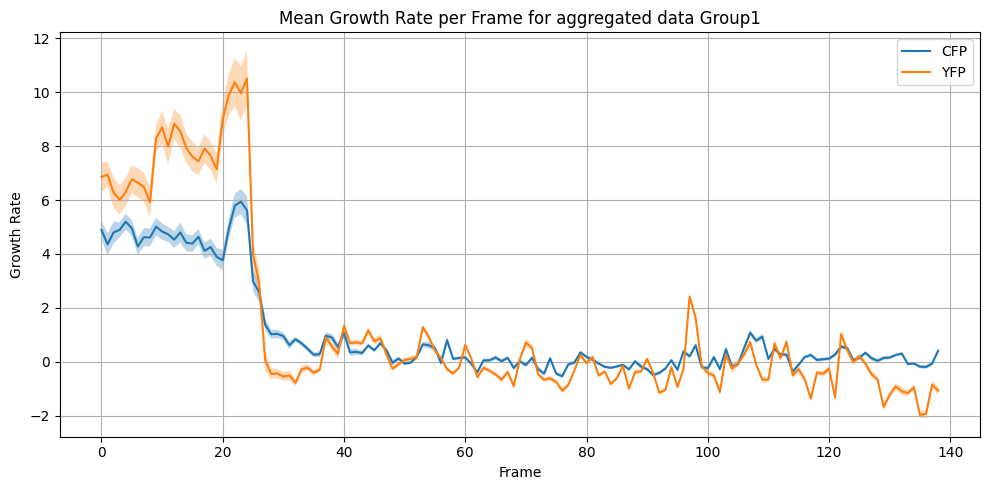

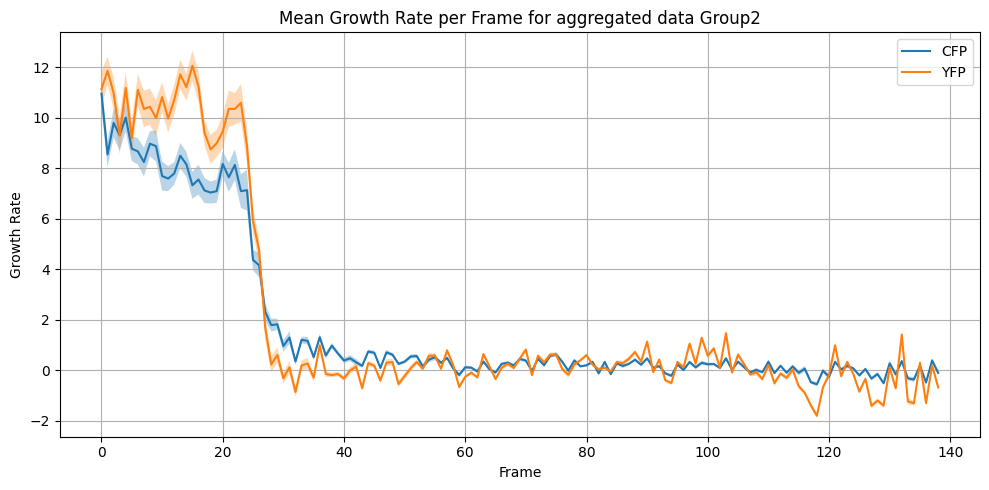

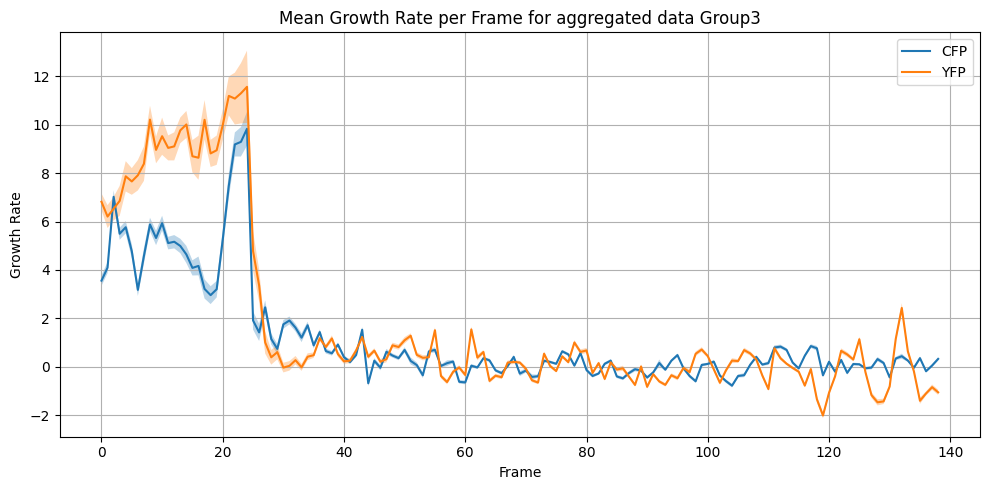

In [ ]:
from fluid_experiment.fluid_experiment import FluidExperiment
import os
from mutate.fuse import fuse_track_output

path_experiment = "/Users/lukasv/DATA/midap/FluidPhage_REP1_results"
color_channels = ["CFP","YFP"]
name = "FluidPhage"

#dataset 2
#path_experiment = "/Users/lukasv/DATA/midap/midap_3channelfamily"
#color_channels = ["cfp","mcherry","yfp"]
#name = "3channelfamily"


exp = FluidExperiment(path_experiment,color_channels, name=name)
exp_wrong_channels = FluidExperiment(path_experiment,["CFP"], name=name)

exp_nometa = FluidExperiment.from_copy(exp)

exp.create_metdata_template()
exp.load_metadata_template()

exp_meta = FluidExperiment.from_copy(exp)

exp.calculate_growth_rate(5,"trackID","area")

exp.plot_rates(group_by="group")


NameError: name 'exp2' is not defined